In [81]:
#to import all the libraries

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver import Chrome
import pandas as pd
import numpy as np


import inspect

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

#get the link by using driver.get() instead of url.open() as the webpage requires people to login in


In [10]:

driver = Chrome("./chromedriver")
driver.get("https://www.timeshighereducation.com/world-university-rankings/2021/world-ranking#!/page/0/length/-1/sort_by/rank/sort_order/asc/cols/stats")

In [11]:

#create lists for storing the data including find number of students, number of students per staff, the percentage of internation students and female:male ratio

#create a data frame for storing the data

In [12]:
bs = BeautifulSoup(driver.page_source, 'html.parser')
search_result_list = bs.find_all('tr', {"role": "row"})

name_list = []
country_list = []
stats_number_students = []
stats_student_staff_ratio = []
stats_pc_intl_students = []
stats_female_male_ratio = []


for i in range(1, 301):
    name_list.append(search_result_list[i].find('a', {'class': 'ranking-institution-title'}).get_text())
    country_list.append(search_result_list[i].find('div', {'class': 'location'}).get_text())
    stats_number_students.append(search_result_list[i].find('td', {'class': 'stats stats_number_students'}).get_text())
    stats_student_staff_ratio.append(search_result_list[i].find('td', {'class': 'stats stats_student_staff_ratio'}).get_text())
    stats_pc_intl_students.append(search_result_list[i].find('td', {'class': 'stats stats_pc_intl_students'}).get_text())
    stats_female_male_ratio.append(search_result_list[i].find('td', {'class': 'stats stats_female_male_ratio'}).get_text())
    

uni_df = pd.DataFrame({'name': name_list[0:250], 'Country': country_list[0:250], 'No. of students': stats_number_students[0:250], "Students per staff": stats_student_staff_ratio[0:250], 'International Student': stats_pc_intl_students[0:250], 'Female: male ratio': stats_female_male_ratio[0:250]})  

uni_df_100 = pd.DataFrame({'name': name_list[0:100], 'Country': country_list[0:100], 'No. of students': stats_number_students[0:100], "Students per staff": stats_student_staff_ratio[0:100], 'International Student': stats_pc_intl_students[0:100], 'Female: male ratio': stats_female_male_ratio[0:100]})  

uni_df_300 = pd.DataFrame({'name': name_list[100:300], 'Country': country_list[100:300], 'No. of students': stats_number_students[100:300], "Students per staff": stats_student_staff_ratio[100:300], 'International Student': stats_pc_intl_students[100:300], 'Female: male ratio': stats_female_male_ratio[100:300]})  




In [13]:

#deadling with missing vlaues


In [14]:
uni_df = uni_df.replace(to_replace = ['n/a', 'n/' ,'/a', '/', 'n', 'a'], value = np.nan)
uni_df_100 = uni_df_100.replace(to_replace = ['n/a', 'n/' ,'/a', '/', 'n', 'a'], value = np.nan)
uni_df_300 = uni_df_300.replace(to_replace = ['n/a', 'n/' ,'/a', '/', 'n', 'a'], value = np.nan)


uni_df.to_csv('uni_df.csv')

In [15]:

#creating extra columns for storing float type values
#using a for-loop to convert the data into float type


In [16]:

uni_df['International Student Int'] = float(0)
uni_df['Female ratio'] = float(0)
uni_df['male ratio'] = float(0)
uni_df['No. of students Int'] = float(0)
uni_df['Students per staff Int'] = float(0)


for i in range(0, 250):
    if (isinstance(uni_df['International Student'][i][:-1], str)):
        uni_df.iloc[i, 6] = float(uni_df['International Student'][i][:-1].replace(' ', ''))
        
    if (isinstance(uni_df['Female: male ratio'][i], str)):
        uni_df.iloc[i, 7] = float(uni_df['Female: male ratio'][i][0:2].replace(' ', ''))
        
    if (isinstance(uni_df['Female: male ratio'][i], str)):
        uni_df.iloc[i, 8] = float(uni_df['Female: male ratio'][i][-2:].replace(' ', ''))
        
    if (isinstance(uni_df['No. of students'][i], str)):
        uni_df.iloc[i, 9] = float(uni_df['No. of students'][i].replace(',', ''))
    
    uni_df.iloc[i, 10] = float(uni_df['Students per staff'][i])

    
    
uni_df.to_csv('uni_df.csv')



In [ ]:
#deadling with missing vlaues

In [17]:
uni_df = uni_df.replace(to_replace = 0, value = np.nan)

In [16]:
uni_df

,Unnamed: 0,name,Country,No. of students,Students per staff,International Student,Female: male ratio,International Student Int,Female ratio,male ratio,No. of students Int,Students per staff Int
0,0,University of Oxford,United Kingdom,"20,774",11.1,41%,46 : 54,41.0,46.0,54.0,20774.0,11.1
1,1,Stanford University,United States,"16,223",7.4,23%,44 : 56,23.0,44.0,56.0,16223.0,7.4
2,2,Harvard University,United States,"21,261",9.3,25%,49 : 51,25.0,49.0,51.0,21261.0,9.3
3,3,California Institute of Technology,United States,"2,238",6.3,33%,36 : 64,33.0,36.0,64.0,2238.0,6.3
4,4,Massachusetts Institute of Technology,United States,"11,276",8.4,34%,39 : 61,34.0,39.0,61.0,11276.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Virginia Polytechnic Institute and State Unive...,United States,"34,155",18.4,14%,43 : 57,14.0,43.0,57.0,34155.0,18.4
246,246,University of Waterloo,Canada,"32,804",22.8,21%,47 : 53,21.0,47.0,53.0,32804.0,22.8
247,247,Western University,Canada,"29,865",22.8,18%,56 : 44,18.0,56.0,44.0,29865.0,22.8
248,248,University of the Witwatersrand,South Africa,"27,839",25.8,7%,55 : 45,7.0,55.0,45.0,27839.0,25.8


In [ ]:

#group the data by country


In [5]:
uni_df_gp = uni_df.groupby('Country')

uni_df_gp.size().sort_values(ascending=False)

Country
United States         69
United Kingdom        34
Germany               24
Australia             17
Netherlands           13
Canada                10
Switzerland            7
Sweden                 7
China                  7
South Korea            7
France                 6
Denmark                5
Belgium                5
Hong Kong              5
Italy                  4
Austria                4
Spain                  3
Japan                  3
Singapore              2
South Africa           2
New Zealand            2
Russian Federation     2
Norway                 2
Israel                 2
Ireland                2
Finland                2
Saudi Arabia           1
Brazil                 1
Taiwan                 1
Luxembourg             1
dtype: int64

In [7]:
others = 0

for i in range(5, 30):
    others = others + uni_df_gp.size().sort_values(ascending=False)[i]


others = others - uni_df_gp.size()['China'] - uni_df_gp.size()['Hong Kong']

others

81

In [8]:
uni_df = pd.read_csv('uni_df.csv')

In [ ]:
#creating a pie chart for Number of University by Country in Top 250 University

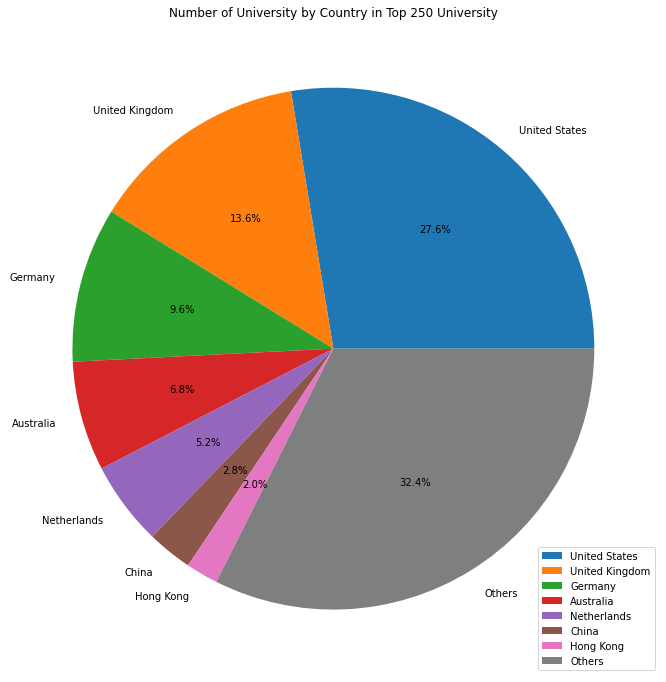

In [9]:

labels = ['United States', 'United Kingdom', 'Germany', 'Australia', 'Netherlands', 'China', 'Hong Kong', 'Others']

country   = [uni_df_gp.size()['United States'], uni_df_gp.size()['United Kingdom'], uni_df_gp.size()['Germany'], uni_df_gp.size()['Australia'], uni_df_gp.size()['Netherlands'], uni_df_gp.size()['China'], uni_df_gp.size()['Hong Kong'], others]

fig,ax = plt.subplots(1,1,figsize=(12,12))

ax.pie(country, labels=labels,autopct='%1.1f%%')
ax.legend(loc='lower right')
ax.set_title('Number of University by Country in Top 250 University')
plt.show() 

fig.savefig('Number of University by Country.jpg', dpi=1200, bbox_inches='tight')


In [ ]:
#creating pie charts for Female : Male Ratio 

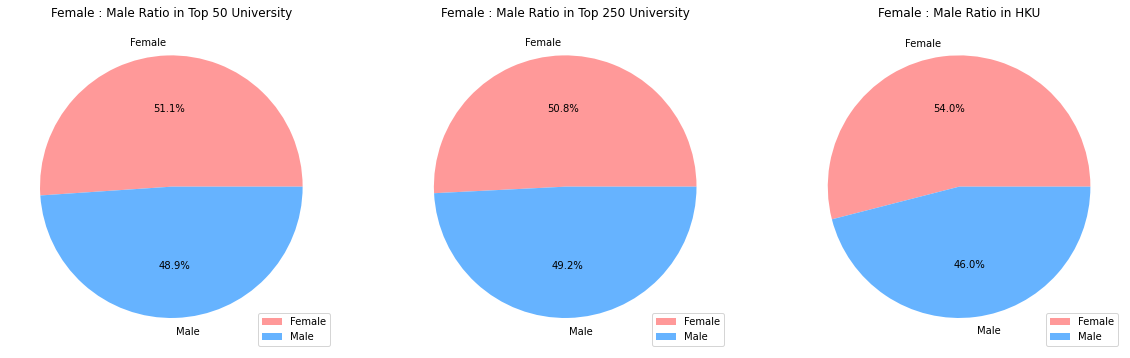

In [10]:

labels = ['Female', 'Male']

country   = [uni_df.mean()['Female ratio'], uni_df.mean()['male ratio']]
fig,ax = plt.subplots(1,3,figsize=(20,8))

colorr = ['#ff9999','#66b3ff']

ax1fmr = [uni_df.iloc[38, 8], uni_df.iloc[38, 9]]

mean_female_50_arr = [uni_df[0:50].mean()['male ratio'], uni_df[0:50].mean()['Female ratio']]


ax[0].pie(mean_female_50_arr, labels = labels, autopct = '%1.1f%%', colors = colorr)
ax[0].legend(loc='lower right')
ax[0].set_title('Female : Male Ratio in Top 50 University')


ax[1].pie(country, labels=labels,autopct='%1.1f%%', colors = colorr)
ax[1].legend(loc='lower right')
ax[1].set_title('Female : Male Ratio in Top 250 University')

ax[2].pie(ax1fmr, labels = labels, autopct = '%1.1f%%', colors = colorr)
ax[2].legend(loc='lower right')
ax[2].set_title('Female : Male Ratio in HKU')


plt.show() 

fig.savefig('Female : Male Ratio.jpg', dpi=1200, bbox_inches='tight')



In [ ]:
#creating bar chart for number of students per staff

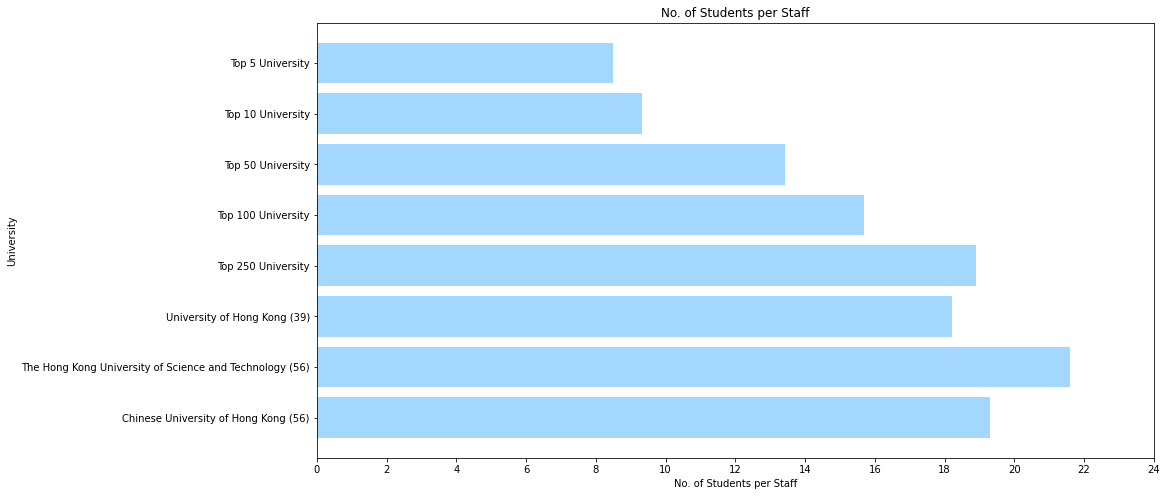

In [11]:
data = [['Chinese University of Hong Kong (56)', uni_df.iloc[55, 11]], ['The Hong Kong University of Science and Technology (56)', uni_df.iloc[56, 11]],['University of Hong Kong (39)', uni_df.iloc[38, 11]] , ['Top 250 University', uni_df[0:250].mean()['Students per staff Int']],['Top 100 University', uni_df[0:100].mean()['Students per staff Int']], ['Top 50 University', uni_df[0:50].mean()['Students per staff Int']], ['Top 10 University', uni_df[0:10].mean()['Students per staff Int']], ['Top 5 University', uni_df[0:5].mean()['Students per staff Int']]]


df = pd.DataFrame(data, columns=['university', 'no. of students per staff'])

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('No. of Students per Staff')

ax.barh(np.arange(len(df)), df['no. of students per staff'], color = '#A3D7FE')

ax.set_xlabel('No. of Students per Staff')
ax.set_ylabel('University')

ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(df['university'])

ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

plt.show()

fig.savefig('No of Students per Staff.jpg', dpi=1200, bbox_inches='tight')

In [ ]:
#creating a scatter plot for finding the correlation between university ranking and the number of students per staff

The Correlation between University Ranking and No. of Students per Staff is
0.17059188349267337


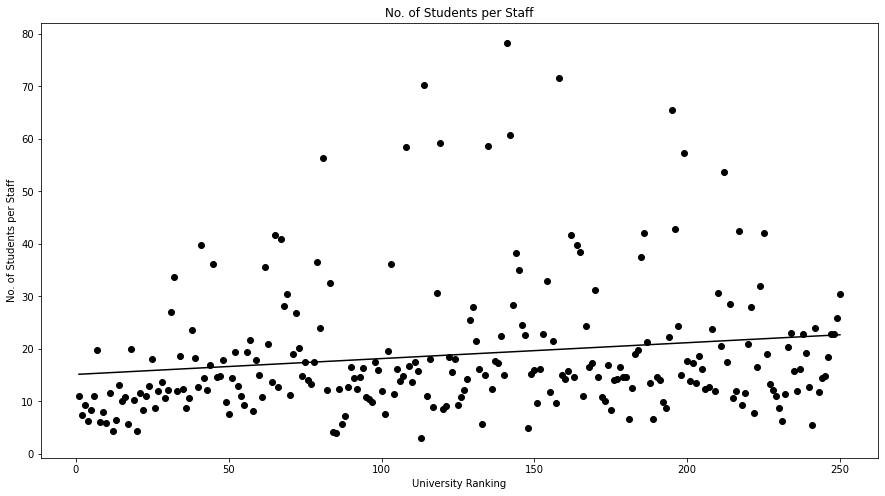

In [12]:
def give_me_a_straight_line(x,y):
    w, b  = np.polyfit(x,y,deg=1)
    line  = w * x + b
    return line

index = range(1, 251)

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('No. of Students per Staff')


#ax.plot(index, uni_df['Students per staff Int'], 'o', color='black')
ax.scatter(index, uni_df['Students per staff Int'], c = 'k')
ax.plot(index, give_me_a_straight_line(index, uni_df['Students per staff Int']), c='k')

ax.set_xlabel('University Ranking')
ax.set_ylabel('No. of Students per Staff')



print("The Correlation between University Ranking and No. of Students per Staff is")
print(np.corrcoef(uni_df.index, uni_df['Students per staff Int'])[0][1])


plt.show()


fig.savefig('No of Students per Staff line.jpg', dpi=1200, bbox_inches='tight')



In [ ]:
#creating a bar chart for international students in percentage

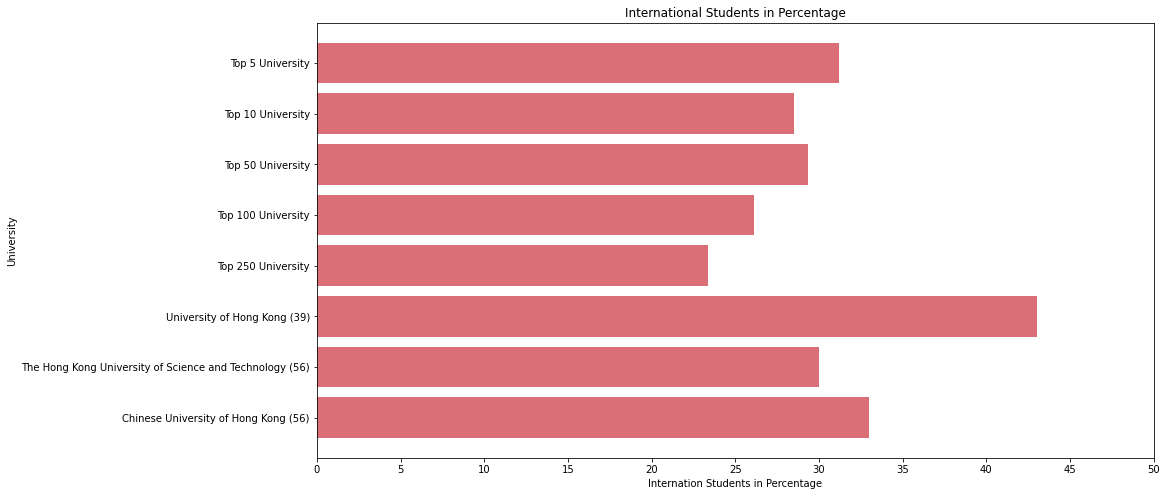

In [13]:

data = [['Chinese University of Hong Kong (56)', uni_df.iloc[55, 7]], ['The Hong Kong University of Science and Technology (56)', uni_df.iloc[56, 7]],['University of Hong Kong (39)', uni_df.iloc[38, 7]] , ['Top 250 University', uni_df[0:250].mean()['International Student Int']],['Top 100 University', uni_df[0:100].mean()['International Student Int']], ['Top 50 University', uni_df[0:50].mean()['International Student Int']], ['Top 10 University', uni_df[0:10].mean()['International Student Int']], ['Top 5 University', uni_df[0:5].mean()['International Student Int']]]


df = pd.DataFrame(data, columns=['university', 'internation students in percentage'])

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Percentage of Internation Students')

ax.barh(np.arange(len(df)), df['internation students in percentage'], color = '#DB6F77')

ax.set_xlabel('Percentage of Internation Students')
ax.set_ylabel('University')

ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(df['university'])

ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.show()

fig.savefig('Percentage of Internation Students.jpg', dpi=1200, bbox_inches='tight')



In [ ]:
#creating a scatter plot for finding the correlation between university ranking and percentage of internation students

The Correlation between University Ranking and Internation Students in Percentage is
-0.20473666744370458


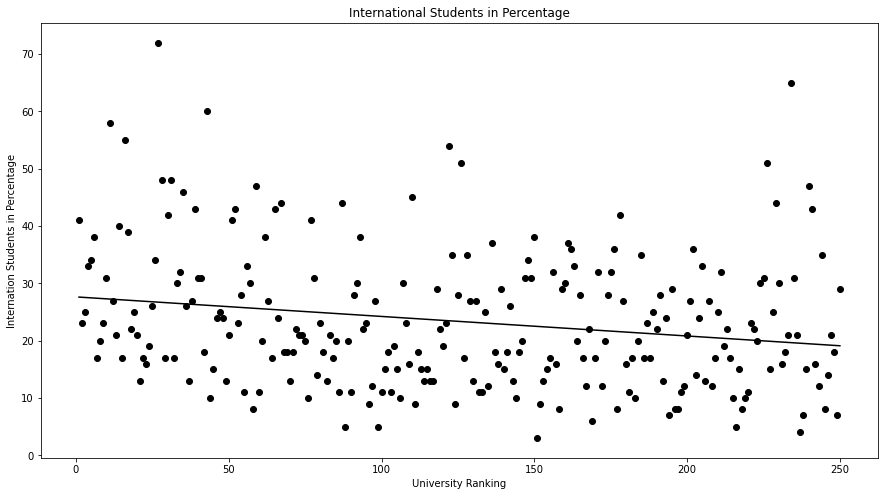

In [14]:
index = range(1, 251)


fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('International Students in Percentage')


ax.scatter(index, uni_df['International Student Int'], c = 'k')
ax.plot(index, give_me_a_straight_line(index, uni_df['International Student Int']), c='k')

ax.set_xlabel('University Ranking')
ax.set_ylabel('Internation Students in Percentage')

print("The Correlation between University Ranking and Internation Students in Percentage is")
print(np.corrcoef(uni_df.index, uni_df['International Student Int'])[0][1])

plt.show()

fig.savefig('Internation Students in Percentage line.jpg', dpi=1200, bbox_inches='tight')



In [ ]:
#creating a scatter plot for finding the correlation between university ranking and number of students

The Correlation between University Ranking and No. of students Int is
-0.1481625801760373


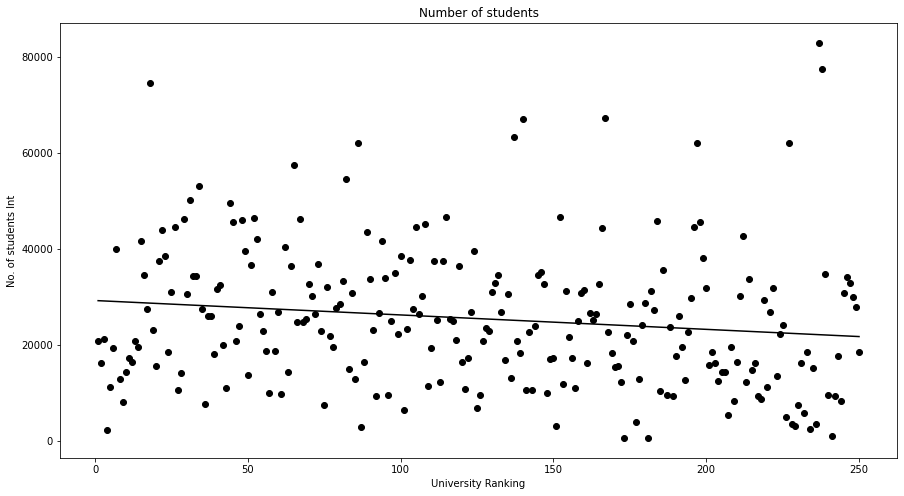

In [18]:
index = range(1, 251)


fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Number of students')


ax.scatter(index, uni_df['No. of students Int'], c = 'k')
ax.plot(index, give_me_a_straight_line(index, uni_df['No. of students Int']), c='k')

ax.set_xlabel('University Ranking')
ax.set_ylabel('No. of students Int')

print("The Correlation between University Ranking and No. of students Int is")
print(np.corrcoef(uni_df.index, uni_df['No. of students Int'])[0][1])

plt.show()

fig.savefig('No of students Int.jpg', dpi=1200, bbox_inches='tight')

